Epoch: 100; Error: 5.844295614890987;
Epoch: 200; Error: 1.6630834401915124;
Epoch: 300; Error: 0.5185458899054379;
Epoch: 400; Error: 0.3466746525443344;
Epoch: 500; Error: 0.05635374984012586;
Epoch: 600; Error: 0.07674844794963051;
Epoch: 700; Error: 0.027019762638200592;
Epoch: 800; Error: 0.024717835765832506;
The maximum number of train epochs is reached


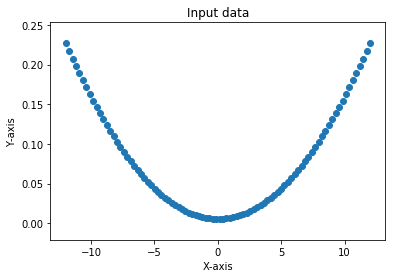

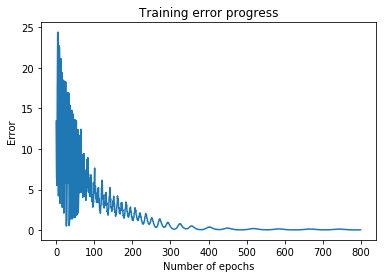

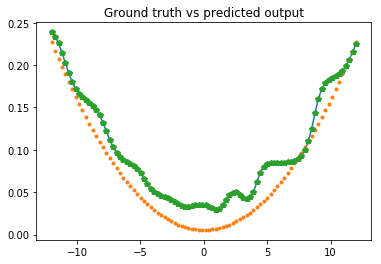

In [2]:
import neurolab as nl
import numpy as np
import matplotlib.pyplot as plt

# 生成训练数据
min_value = -12
max_value = 12
num_datapoints = 90
x = np.linspace(min_value, max_value, num_datapoints)
y = 2 * np.square(x) + 7
y /= np.linalg.norm(y)
# 数组变形
data = x.reshape(num_datapoints, 1)
labels = y.reshape(num_datapoints, 1)
# 画图
plt.figure()
plt.scatter(data, labels)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Input data')
# 定义一个深度神经网络，该神经网络包含两个隐藏层，每个隐藏层包含10个神经元
multilayer_net = nl.net.newff([[min_value, max_value]], [10, 10, 1])
# 设置训练方法为梯度下降法
multilayer_net.trainf = nl.train.train_gd
# 训练网络
error = multilayer_net.train(data, labels, epochs=800, show=100, goal=0.01) # show为100表示每迭代100次显示一次
# 用训练数据运行该网络，预测结果
predicted_output = multilayer_net.sim(data)
# 画出训练误差结果
plt.figure()
plt.plot(error)
plt.xlabel('Number of epochs')
plt.ylabel('Error')
plt.title('Training error progress')

# 创建一组新的输入数据，并运行神经网络，查看其性能表现
x2 = np.linspace(min_value, max_value, num_datapoints * 2)
y2 = multilayer_net.sim(x2.reshape(x2.size,1)).reshape(x2.size)
y3 = predicted_output.reshape(num_datapoints)
# 画出输入结果
plt.figure()
plt.plot(x2, y2, '-', x, y, '.', x, y3, 'p')
plt.title('Ground truth vs predicted output')

plt.show()